Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("Data.csv")
data = data[ (data['Label']!=2) ]

# 将所有Label为2的值剔除



In [3]:
X = data.iloc[:,1:16]  #特征值和样本
y = data.iloc[:,16]  #样本个数
X.shape # 查看X大小
print(y)

0       0
1       0
2       0
3       1
4       1
       ..
5339    0
5340    0
5341    0
5342    0
5343    0
Name: Label, Length: 5330, dtype: int64


In [4]:
X_centered = X - X.mean(axis=0)
#print(X_centered)
#去中心化

In [5]:
U, s, Vt = np.linalg.svd(X_centered) 
# 奇异值等于特征值，越大越重要
print(s) # 从大到小进行排序
# 对去中心化后的样本进行奇异值分解(SVD)

[60.81980662 46.29949904 39.23582907 35.819739   34.55681834 33.89586371
 33.34295772 31.83502767 30.82998087 28.91431111 28.01778435 27.17005763
 26.23155221 22.0625047  19.25162679]


In [6]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
#c1 = Vt.T[:, sort_list[13]]
#c2 = Vt.T[:, sort_list[14]]
# 获取PCA所需要的特征向量，通过在右奇异矩阵中取得特征向量（右奇异矩阵的列就是特征向量）
#print(Vt.T[:,:])
#W2 = np.column_stack((eigen_vecs[:,sort_list[0]],eigen_vecs[:,sort_list[1]]))
W2 = np.c_[c1,c2]
# 将两个矩阵结合在一起
print(W2)

[[-0.19315897 -0.02586621]
 [-0.43730123 -0.15967594]
 [-0.10978926 -0.31819069]
 [ 0.41304688  0.19887015]
 [-0.31169489 -0.43793481]
 [ 0.02581377 -0.40041767]
 [-0.06380929 -0.26863968]
 [ 0.08003049 -0.2960036 ]
 [ 0.27538642 -0.15195929]
 [ 0.36211566 -0.16943987]
 [ 0.26860527 -0.30159332]
 [-0.14179204 -0.1018571 ]
 [ 0.1763005  -0.33385848]
 [ 0.29836925 -0.09834449]
 [ 0.24733375 -0.21648384]]


             0         1
0    -0.854857 -0.796125
1    -0.640427 -0.855369
2    -0.691962 -0.345587
3    -0.390339 -0.923417
4     0.181921  0.452353
...        ...       ...
5339  0.699310 -0.410470
5340 -0.946077 -0.278737
5341 -1.072641  0.888573
5342 -0.143051  0.141427
5343 -0.121780  0.056317

[5330 rows x 2 columns]


Text(0, 0.5, 'c2')

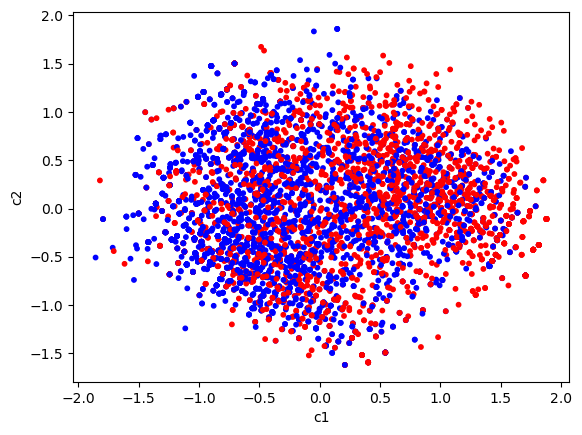

In [7]:
X2D = X_centered.dot(W2)
print(X2D)
# 将所有样本数据进行转化,

colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X2D.iloc[:, 0], X2D.iloc[:, 1],color=colors,s=10)
plt.xlabel("c1")
plt.ylabel("c2")
#plt.scatter(X2D.iloc[:,0], X2D.iloc[:,1], c="#4EACC5", s= 0.5)


# 将所有样本关于2个特征的方差散点图表示出来

# plt.show()

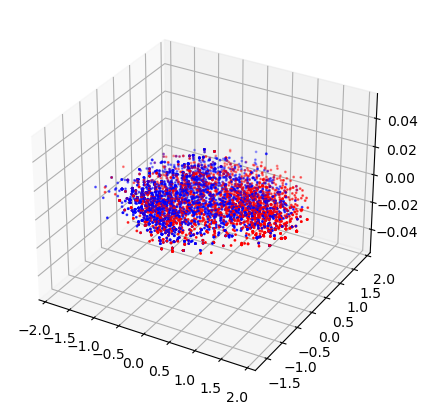

In [8]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X2D.iloc[:, 0], X2D.iloc[:, 1],color=colors,s=1)
# 建立三维模型图

#ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2])
#选取前三个问题作为特征坐标进行查看分析

[0.20563148 0.32479741 0.41037602 0.48170144 0.54808599 0.61195541
 0.67375816 0.73009727 0.78293523 0.82941085 0.87304908 0.91408656
 0.95233797 0.97939681 1.        ]


Text(0, 0.5, 'Explained Variance')

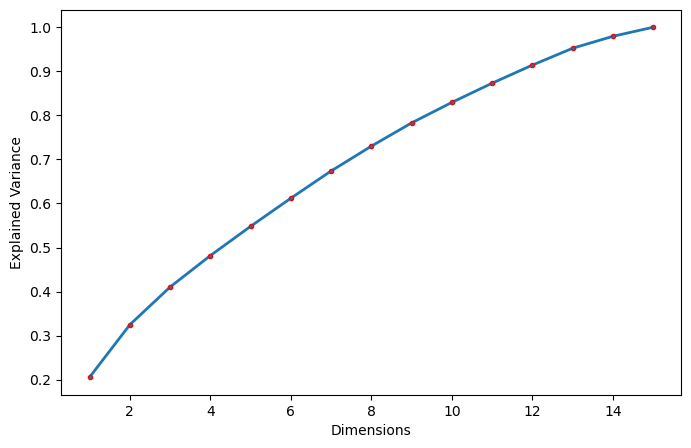

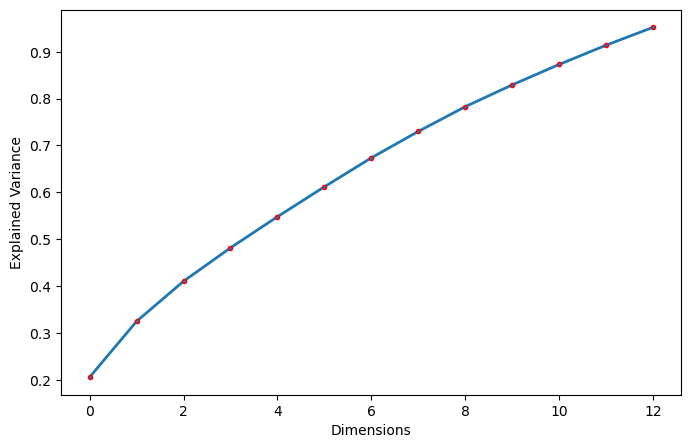

In [9]:
# 使用PCA的方法进行模拟

pca2 = PCA() 
pca3 = PCA(n_components = 13) 
# 使保留的特征只有10个80% 13个95%

# 求得数据集均值，方差，最大值，最小值,这些训练集固有的属性，然后进行降维
X_all = pca2.fit_transform(X_centered) #5330*15
# 15维都在
X_d13 = pca3.fit_transform(X_centered) #5330*13
# 保留13维，此时的比率较好
# explained_variance_ratio_需要用到此数据
cumsum = np.cumsum(pca2.explained_variance_ratio_)
cumsum1 = np.cumsum(pca3.explained_variance_ratio_)
# 计算方差比
print(cumsum)
y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# 使维度比率可视化
plt.figure(figsize=(8, 5))
plt.plot(y,cumsum, linewidth=2,marker='.',markeredgecolor='r')
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
# 将不同维度的特征方差比率可视化
plt.figure(figsize=(8, 5))
plt.plot(cumsum1, linewidth=2,marker='.',markeredgecolor='r')
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
# 将维度13提取出来看看是否比率较高

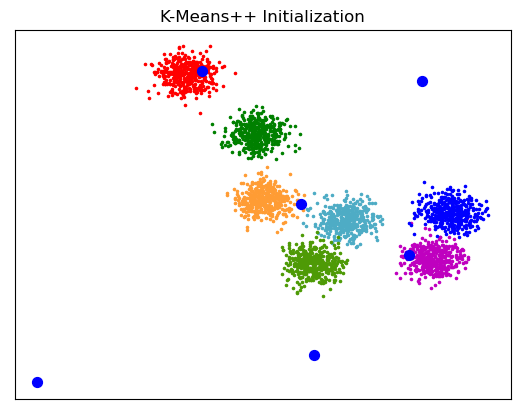

In [62]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = X.shape[0]
n_components = 13

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(X, n_clusters=6, random_state=0)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m","r","g","b"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

## Task 2 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
from Out_detection import outlier_detection_and_classification
from Out_detection_2 import outlier_detection_and_classification_2
import pandas as pd

In [12]:
# 将训练集和测试集分类开
y = data.Label
y = np.array(y.values.tolist())
X_train, X_test, y_train, y_test = train_test_split(X_d13, y, test_size=0.3, random_state=40)
print(X_train.shape,X_test.shape)
print(X_d13)
print(y_train)

(3731, 13) (1599, 13)
[[-0.85485728 -0.7961254   0.18785627 ... -0.18140836 -0.06417894
  -0.39559439]
 [-0.64042679 -0.85536868 -0.18489112 ...  0.24929938 -0.09993871
  -0.22368558]
 [-0.69196206 -0.34558654  0.28566289 ...  0.2910275   0.04521565
   0.05018293]
 ...
 [-1.0726409   0.88857299  0.15014473 ... -0.21639567 -0.64514237
   0.07868151]
 [-0.1430512   0.14142688  1.30757588 ... -0.90360503 -0.19685352
   0.15015357]
 [-0.12177968  0.05631739  1.12109941 ... -0.4926267  -0.37442171
   0.58635896]]
[1 1 1 ... 0 1 1]


In [15]:
# 数据规范化标准化
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
ss_train_x = ss.fit_transform(X_train)
ss_test_x = ss.fit_transform(X_test)
ss_X_cen = ss.fit_transform(X_centered)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [16]:
# SVC
from sklearn import svm
from sklearn.svm import SVC

model = svm.SVC(C=1)  #svm.SVC(kernel='poly',C=3)
model.fit(ss_train_x,y_train)
pre = model.predict(ss_test_x)
acc2 = metrics.accuracy_score(pre, y_test)
f1sco = metrics.f1_score(pre, y_test)
print("The accuracy of SVM is",acc2)
print("The recall of SVM is",metrics.recall_score(pre, y_test))
print("The f1_score of SVM is",f1sco)

The accuracy of SVM is 0.707942464040025
The recall of SVM is 0.698170731707317
The f1_score of SVM is 0.6623282718727405


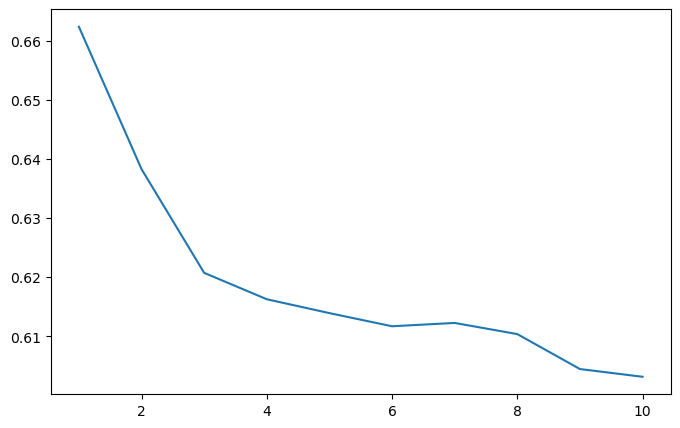

In [17]:
# 舍弃有问题，怎么让结果可视化怎么存在数组里
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 5))
a_index=list(range(1,11))
a=pd.Series(dtype='float64')

for i in range(1,100,10):
     model = svm.SVC(C=i)
     model.fit(ss_train_x,y_train)
     pre = model.predict(ss_test_x)
     f1sco = metrics.f1_score(pre, y_test)
     a=a.append(pd.Series(f1sco))
plt.plot(a_index, a)


In [25]:
# 监督学习决策树
import warnings
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# max_depth设置决策随机森林中的决策树的最大深度，深度越大，越容易过拟合，推荐树的深度为：5-20之间
# criterion ： gini或者entropy,前者是基尼系数，后者是信息熵；
dtc = DecisionTreeClassifier(max_depth=4,criterion='gini')
# max_depth=8  0.6779237023139462
# max_depth=6  0.6779237023139462
dtc.fit(ss_train_x, y_train)
predict_y = dtc.predict(ss_test_x)
# 准确度
# plot_matrix(y_test, predict_y, [0, 1], title='Decision Tree',axis_labels=['0', '1'])

# print('The accuracy of Decision Tree Classifier is', metrics.accuracy_score(predict_y, y_test))
# print('The recall of Decision Tree Classifier is', metrics.recall_score(predict_y, y_test))
# print('The F1 of Decision Tree Classifier is', metrics.f1_score(predict_y, y_test))
# # warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 5))
a_index=list(range(1,21))
a=pd.Series(dtype='float64')

for i in range(1,21):
     model = DecisionTreeClassifier(max_depth=i,criterion='gini')
     model.fit(ss_train_x,y_train)
     pre = model.predict(ss_test_x)
     f1sco = metrics.f1_score(pre, y_test)
     a=a.append(pd.Series(f1sco))
plt.plot(a_index, a,marker='.',markeredgecolor='r')

# warnings.filterwarnings("ignore")
# plt.figure(figsize=(8, 5))
# b_index=list(range(1,21))
# b=pd.Series(dtype='float64')
# for i in range(1,21):
#      model = DecisionTreeClassifier(max_depth=i,criterion='entropy')
#      model.fit(ss_train_x,y_train)
#      pre = model.predict(ss_test_x)
#      f1sco = metrics.f1_score(pre, y_test)
#      b=b.append(pd.Series(f1sco))
# plt.plot(b_index, b,marker='.',markeredgecolor='r')
# plt.xlabel('Depth of Tree (max_depth)')
# plt.ylabel('F1-Score')
# plt.title('Decision Tree Classifier(entropy)')



AttributeError: 'NoneType' object has no attribute 'append'

<Figure size 800x500 with 0 Axes>

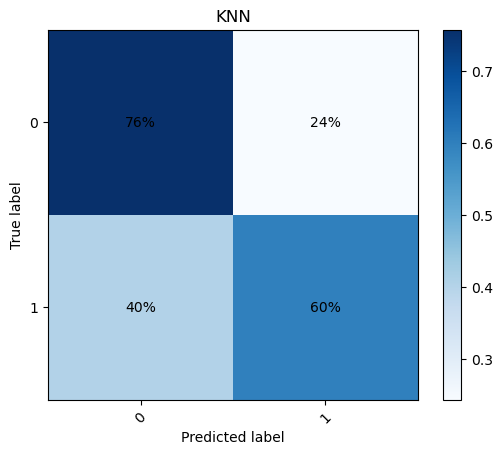

The accuracy of KNN is 0.6841776110068793
The F1 of KNN is 0.6321922796795338


In [82]:
# 监督学习之KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(ss_train_x, y_train)
predict_y = knn.predict(ss_test_x)
# 评价准确度
plot_matrix(y_test, predict_y, [0, 1], title='KNN',axis_labels=['0', '1'])
# print("mean_squared_error:", mean_squared_error(test_y, predict_y))
print('The accuracy of KNN is', metrics.accuracy_score(predict_y,y_test))
print('The F1 of KNN is', metrics.f1_score(predict_y,y_test))

warnings.filterwarnings("ignore")
# plt.figure(figsize=(8, 5))
# b_index=list(range(1,11))
# b=pd.Series(dtype='float64')
# for i in range(1,11):
#      model = KNeighborsClassifier(n_neighbors=i)
#      model.fit(ss_train_x,y_train)
#      pre = model.predict(ss_test_x)
#      f1sco = metrics.f1_score(pre, y_test)
#      b=b.append(pd.Series(f1sco))
# plt.plot(b_index, b,marker='.',markeredgecolor='r')
# plt.xlabel('Number of neighbors (n_neighbours)')
# plt.ylabel('F1-Score')
# plt.title('k-Nearest Neighbour Classifier')

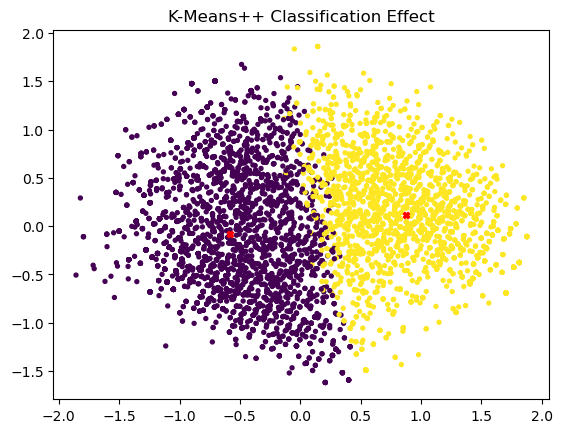

0.15464474597770908


Text(0.5, 1.0, 'Elbow Method')

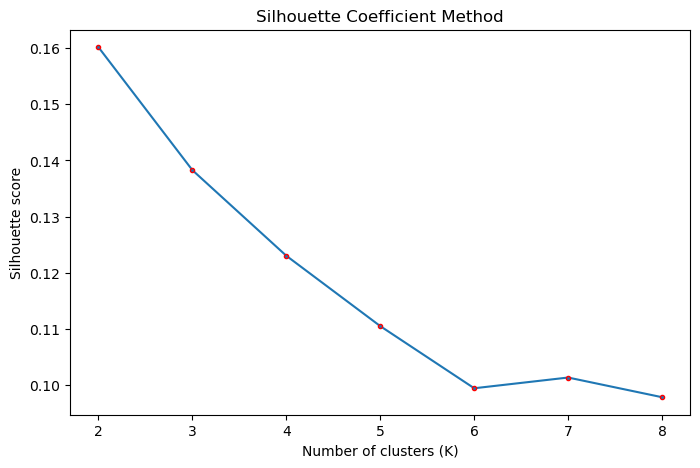

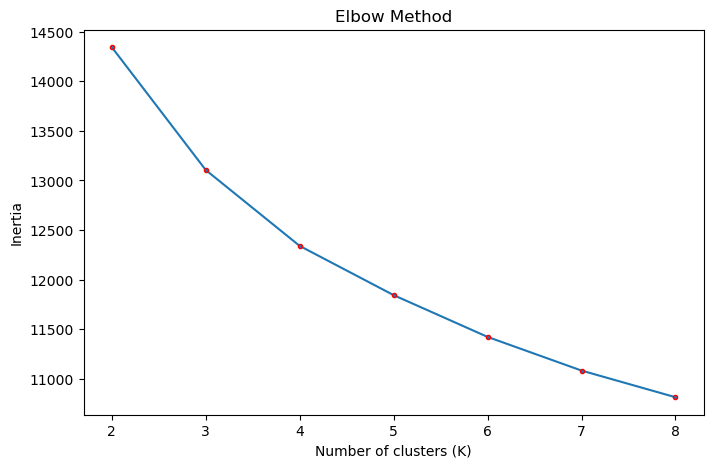

In [ ]:
#无监督学习
from sklearn.cluster import KMeans
import warnings
kmeans = KMeans(n_clusters=2, random_state=42,init="random").fit(X_d13)
pre = kmeans.predict(X_d13)
centroid = kmeans.cluster_centers_


# Calculate seeds from k-means++
# centers_init, indices = kmeans_plusplus(X, n_clusters=2, random_state=42)
colors = ["#4EACC5", "#FF9C34"]
plt.scatter(X_d13[:,0],X_d13[:,1],c=pre,s=8)
plt.scatter(centroid[:,0],centroid[:,1],marker="X",s=20,c="r")

plt.title('K-Means++ Classification Effect')
plt.show()
print(metrics.silhouette_score(X_all,pre))

warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 5))

a_index=list(range(2,9))
a=pd.Series(dtype='float64')
b_index=list(range(2,9))
b=pd.Series(dtype='float64')
for i in range(2,9):
     kmeans = KMeans(n_clusters=i, random_state=42).fit(X_d13)
     pre1 = kmeans.predict(X_d13)
     scor1 = kmeans.inertia_
     scor = metrics.silhouette_score(X_d13,pre1)
     #scor=metrics.accuracy_score(pre1, y)
     a=a.append(pd.Series(scor1))
     b=b.append(pd.Series(scor))
plt.plot(b_index, b,marker='.',markeredgecolor='r')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Coefficient Method')


plt.figure(figsize=(8, 5))
plt.plot(a_index, a,marker='.',markeredgecolor='r')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')




In [20]:
import matplotlib.pyplot as pl
from sklearn import metrics

def plot_matrix(y_true, y_pred, labels_name, title=None, thresh=0.8, axis_labels=None):
# 利用sklearn中的函数生成混淆矩阵并归一化
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels_name, sample_weight=None)  # 生成混淆矩阵 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 归一化

# 画图，如果希望改变颜色风格，可以改变此部分的cmap=pl.get_cmap('Blues')处
    pl.imshow(cm, interpolation='nearest', cmap=pl.get_cmap('Blues'))
    pl.colorbar()  # 绘制图例

# 图像标题
    if title is not None:
        pl.title(title)
# 绘制坐标
    num_local = np.array(range(len(labels_name)))
    if axis_labels is None:
        axis_labels = labels_name
    pl.xticks(num_local, axis_labels, rotation=45)  # 将标签印在x轴坐标上， 并倾斜45度
    pl.yticks(num_local, axis_labels)  # 将标签印在y轴坐标上
    pl.ylabel('True label')
    pl.xlabel('Predicted label')

# 将百分比打印在相应的格子内，大于thresh的用白字，小于的用黑字
    for i in range(np.shape(cm)[0]):
        for j in range(np.shape(cm)[1]):
            if int(cm[i][j] * 100 + 0.5) > 0:
                pl.text(j, i, format(int(cm[i][j] * 100 + 0.5), 'd') + '%',
                        ha="center", va="center",
                        color="white" if cm[i][j] > thresh else "black")  # 如果要更改颜色风格，需要同时更改此行
# 显示
    pl.show()



In [18]:
# 监督学习使用多核

svc = SVC(kernel = 'poly',C=300)
svc.fit(ss_test_x,y_test)
pre=svc.predict(ss_test_x)
print('The accuracy of poly is',svc.score(ss_test_x,y_test))
print('The F1 of poly is', metrics.f1_score(pre,y_test))
# plot_matrix(y_test, pre, [0, 1], title='SVM Polynomial',axis_labels=['0', '1'])

warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 5))
b_index=list(range(50,501,50))
b=pd.Series(dtype='float64')
for i in range(50,501,50):
     svc = SVC(kernel = 'poly',C=i)
     svc.fit(ss_test_x,y_test)
     pre=svc.predict(ss_test_x)
     f1sco = metrics.f1_score(pre, y_test)
     b=b.append(pd.Series(f1sco))
plt.plot(b_index, b,marker='.',markeredgecolor='r')
plt.xlabel('Value of hyper-parameter (C)')
plt.ylabel('F1-Score')
plt.title('SVC with polynomial kernel')


The accuracy of poly is 0.8561601000625391
The F1 of poly is 0.840720221606648


KeyboardInterrupt: 

<Figure size 800x500 with 0 Axes>

In [19]:
# 使用高斯核函数
svc = SVC(kernel = 'rbf',C=1,gamma=0.2)
svc.fit(ss_test_x,y_test)
pre=svc.predict(ss_test_x)

warnings.filterwarnings("ignore")
plot_matrix(y_test, pre, [0, 1], title='SVM RBF',axis_labels=['0', '1'])
# plt.figure(figsize=(8, 5))
# b_index=range_values = np.arange(0.1, 2.1, 0.1).tolist()
# b=pd.Series(dtype='float64')
# for i in np.arange(0.1, 2.1, 0.1):
#      svc = SVC(kernel = 'rbf',C=1, gamma=i)
#      svc.fit(ss_test_x,y_test)
#      pre=svc.predict(ss_test_x)
#      f1sco = metrics.f1_score(pre, y_test)
#      b=b.append(pd.Series(f1sco))
# plt.plot(b_index, b,marker='.',markeredgecolor='r')
# plt.xlabel('Value of Gamma (gamma)')
# plt.ylabel('F1-Score')
# plt.title('SVC with RBF kernel')

# print('The accuracy of rbf is',svc.score(ss_test_x,y_test))
# print('The F1 of rbf is', metrics.f1_score(pre,y_test))

NameError: name 'plot_matrix' is not defined

In [ ]:
from sklearn.svm import SVR
#for k in ['linear','poly','rbf','sigmoid']:
 #   clf=svm.SVR(kernel=k)
  #  clf.fit(ss_train_x,y_train)
#    score=clf.score(ss_test_x,y_test)
#    print(score)
#高斯核函数
svr = SVR(kernel = 'rbf',C=500,gamma=10)
svr.fit(ss_test_x,y_test)
pre=svr.predict(ss_test_x)
print('The accuracy of RBF is',svr.score(ss_test_x,y_test))
# 准确率是比较高的但是不是以0和1的形式
#print('The f1 of RBF is', metrics.f1_score(pre,y_test))

In [ ]:
# 尝试建立二维分类器
d1 = 0
d2 = 1
X = X_d13[:, [d1,d2]]
#X = np.array(X2D.iloc[:, [d1, d2]])
# 与上一个task相同，选择选取特征值最大的两个特征进行分析

y = data.Label
y = np.array(y.values.tolist())
#y=y.values.tolist()

# 将标签合并到数据集中
X, y = X[y!=2], y[y!=2]
print(X,y)

[[-0.85485728 -0.7961254 ]
 [-0.64042679 -0.85536868]
 [-0.69196206 -0.34558654]
 ...
 [-1.0726409   0.88857299]
 [-0.1430512   0.14142688]
 [-0.12177968  0.05631739]] [0 0 0 ... 0 0 0]


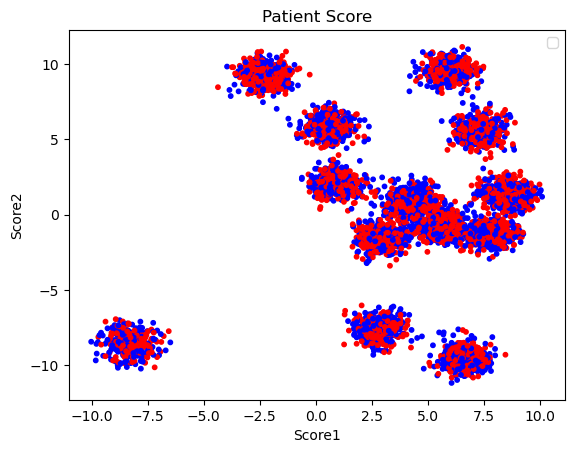

In [73]:
import warnings
warnings.filterwarnings("ignore")
# 会有warning，忽略
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1],color=colors,s=10)
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1],color=colors,s=10)
plt.legend(handles=[plt.scatter([],[], c='blue'),
                    plt.scatter([],[], c='red')])
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.title('Patient Score')
plt.show()

In [75]:
# 导入BP模型
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

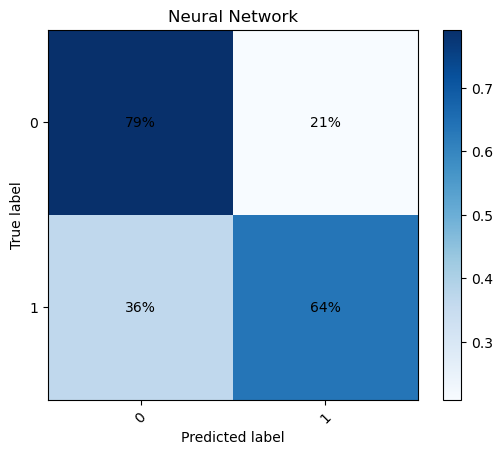

The f1 of BP is 0.673960612691466


In [78]:
# BP神经网络预测
# 建立 BP 模型, 采用sgd优化器，relu非线性映射函数
# sgd 随机初始化所有参数，然后迭代地训练，不断地计算梯度和更新参数，直到满足某个条件为止（比如误差足够小、迭代次数足够多时）

# BP = MLPClassifier(solver='sgd',activation = 'relu',hidden_layer_sizes=(i.i))
# 进行模型训练
# 用未经规范的数据
#with warnings.catch_warnings():
#    warnings.filterwarnings("ignore", category=ConvergenceWarning,
#                            module="sklearn")
#    BP.fit(X_train, y_train)
# 进行预测    
#predict_labels = BP.predict(X_test)  
#print('The accuracy of BP is',BP.score(X_test, y_test))  
# 用经过处理的数据
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=ConvergenceWarning,
#                             module="sklearn")
#     # BP.fit(ss_train_x, y_train)
# 进行预测    
# plt.figure(figsize=(8, 5))
# b_index=list(range(1,101,10))
# b=pd.Series(dtype='float64')
# for i in range(1,101,10):
#      BP = MLPClassifier(solver='sgd',activation = 'relu',hidden_layer_sizes=(i,i))
#      BP.fit(ss_train_x, y_train)
#      pre=BP.predict(ss_test_x)  
#      f1sco = metrics.f1_score(pre, y_test)
#      b=b.append(pd.Series(f1sco))
# plt.plot(b_index, b,marker='.',markeredgecolor='r')
# plt.xlabel('Hidden layer sizes')
# plt.ylabel('F1-Score')
# plt.title('BP Neural Network')
BP = MLPClassifier(solver='sgd',activation = 'relu',hidden_layer_sizes=(10,10))
BP.fit(ss_train_x, y_train)
pre=BP.predict(ss_test_x)
plot_matrix(y_test, pre, [0, 1], title='Neural Network',axis_labels=['0', '1'])
# predict_labels = BP.predict(ss_test_x)  
# print('The accuracy of BP is',BP.score(ss_test_x, y_test)) 
print('The f1 of BP is',metrics.f1_score(pre, y_test))

## Task 3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



## 关于其他的尝试

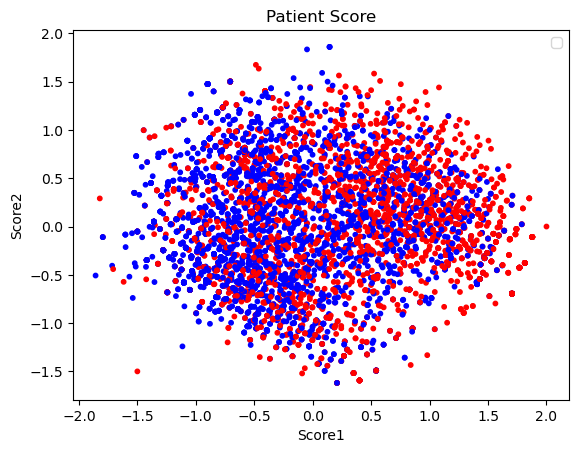

In [ ]:
# 尝试增加离群值
outlier = np.array([[-1.5,-1.5],[2.0,0],[1.0,1.0]])
X_outlier = np.vstack([X[:,[d1, d2]], outlier])
y_outlier = np.append(y, [1,1,0])

colors = ['red' if label == 1 else 'blue' for label in y_outlier]
plt.scatter(X_outlier[:, 0], X_outlier[:, 1],color=colors,s=10)
plt.legend(handles=[plt.scatter([],[], c='blue'),
                    plt.scatter([],[], c='red')])
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.title('Patient Score')
plt.show()

In [ ]:
# 检测离群值
def detect_outliers(X, y, k=10, threshold=0.6):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)

    distances, indices = neigh.kneighbors(X)
    avg_distances = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        same_label_indices = np.where(y[indices[i]] == y[i])[0]
        if len(same_label_indices) > 0:
            same_label_indices = np.delete(same_label_indices, np.where(same_label_indices == i))
            nearest_indices = indices[i, 1:]
            same_label_nearest_indices = np.intersect1d(nearest_indices, same_label_indices)
            if len(same_label_nearest_indices) > 0:
                avg_distances[i] = np.mean(distances[i, np.where(np.isin(indices[i], same_label_nearest_indices))])
            else:
                avg_distances[i] = np.mean(distances[i, 1:k])
    
    outlier_indices = np.where(avg_distances > threshold)[0]
    return outlier_indices


outlier_indices = detect_outliers(X_outlier, y_outlier, k=10, threshold=0.605)
outliers = X_outlier[outlier_indices]

# Mark the outlier points in the figure and bold the borders
plt.scatter(outliers[:, 0], outliers[:, 1], s=100, facecolors='none', edgecolors='g', linewidths=2)
colors = ['red' if label == 1 else 'blue' for label in y_outlier]
plt.scatter(X_outlier[:, 0], X_outlier[:, 1], color=colors,s=10)
plt.legend(handles=[plt.scatter([],[], c='blue', label='Iris Setosa'),
                    plt.scatter([],[], c='red', label='Iris Versicolor')])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset with outliers')
plt.show()

In [ ]:

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [ ]:
# 开始对数据集进行训练 但是 发现总是重叠，也许进行polynomial kernel来更好区分
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


    

# def PolynomialKernelSVC(degree, C=2.0):
#     return Pipeline([
#         ('std_scaler', StandardScaler()),
#         ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
#     ])

# poly_kernel_svc = PolynomialKernelSVC(degree=5)
# poly_kernel_svc.fit(X, y)

svc = SVC(kernel = 'rbf',C=1,gamma=1)
svc.fit(ss_test_x,y_test)
pre=svc.predict(ss_test_x)
warnings.filterwarnings("ignore")
plot_decision_boundary(svc, axis=[-2.0, 2.0, -1.8, 2.0])
# 设置边界的区
plt.scatter(X.iloc[y==0, 0], X.iloc[y==0, 1],s=10)
plt.scatter(X.iloc[y==1, 0], X.iloc[y==1, 1],s=10)
plt.show()




ValueError: X has 2 features, but SVC is expecting 13 features as input.